In [45]:
import random
import time
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np

In [46]:
# Global Constants
TOTAL_AF_SUPPLY = 100000000  # Total supply of $AF tokens
TOTAL_ALFA_SUPPLY = 50000000  # Total supply of $AF tokens
AF_EMISSION_BUDGET_PERCENT = 0.05  # 5% of total supply
AF_EMISSION_BUDGET = TOTAL_AF_SUPPLY * AF_EMISSION_BUDGET_PERCENT
BURNING_CONVERSION_RATE = AF_EMISSION_BUDGET / TOTAL_ALFA_SUPPLY

In [47]:
# AlfaBurningProgram Class
class AlfaBurningProgram:
    def __init__(self):
        self.burners = {}  # Store burner info

    def burn(self, burner, burn_amount, drain_period_days):
        current_time = datetime.now()
        self.burners[burner] = {
            'burnt_amount': burn_amount,
            'drain_period': drain_period_days,
            'drain_started_at': current_time,
            'emission': EmissionRegulator.calculate_burn_emission(burn_amount, drain_period_days)
        }

    def aggregate_burns(self):
        total_burned = sum(burner_info['burnt_amount'] for burner_info in self.burners.values())
        return total_burned
    
    def aggregate_emission(self):
        return sum(burner_info['emission'] for burner_info in self.burners.values())

# EmissionRegulator Class
class EmissionRegulator:

    def calculate_burn_emission(burn_amount, drain_period_days):
        discount_factor = 1 / (1 - drain_period_days / 366)  # Simple discount factor
        return burn_amount * BURNING_CONVERSION_RATE * discount_factor
    

In [48]:

# Initialize Programs
alfa_burning_program = AlfaBurningProgram()
emission_regulator = EmissionRegulator()


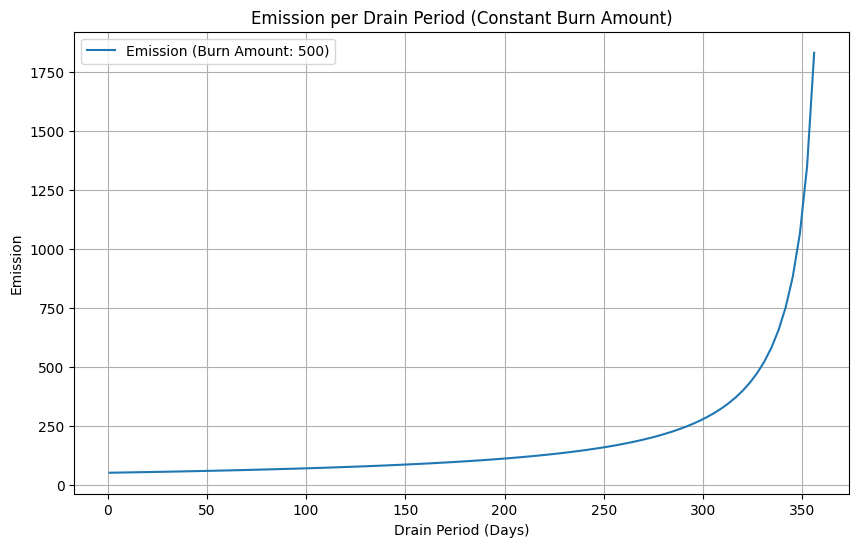

In [49]:
def plot_emission_per_drain_period_curve():
    burn_amount = 500  # Fixed burn amount
    drain_periods = np.linspace(1, 356, 100)  # Range of drain periods from 1 to 100 days

    plt.figure(figsize=(10, 6))
    # Calculate emissions for each drain period
    emissions = [EmissionRegulator.calculate_burn_emission(burn_amount, period) for period in drain_periods]
    plt.plot(drain_periods, emissions, label=f'Emission (Burn Amount: {burn_amount})')

    # Plotting the emission vs. drain period

    plt.xlabel('Drain Period (Days)')
    plt.ylabel('Emission')
    plt.title('Emission per Drain Period (Constant Burn Amount)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function to plot
plot_emission_per_drain_period_curve()

In [50]:
# Output Observability functions

# Plotting burning emissions over time
def plot_burning_output(timestamps, emissions):
    plt.figure(figsize=(12, 6))
    plt.plot(timestamps, emissions, linestyle='-', color='b', label='Total AF Emission Over Time')
    plt.xlabel('Time')
    plt.ylabel('AF Emission')
    plt.title('AF Emission Over Time')
    plt.grid(True)
    plt.legend()
    plt.show()

# Plotting Circulating supply function over time
def plot_alfa_supply_output(timestamps, alfa_supply):
    plt.figure(figsize=(12, 6))
    plt.plot(timestamps, alfa_supply, linestyle='-', color='r', label='ALFA Supply')
    plt.xlabel('Time')
    plt.ylabel('Circulating ALFA Supply')
    plt.title('ALFA Supply Over Time')
    plt.grid(True)
    plt.legend()
    plt.show()

# Print Average
def calculateAverage(lst): 
    return sum(lst) / len(lst)


In [51]:
# Scenario generation function
def generate_burning_scenarios(alfa_burn_program, num_burn_events, max_burn_amount, max_drain_period, total_days):
    # Initialize the scenario results
    alfa_supply_over_time = []
    emissions_over_time = []
    timestamps = []

    burn_amounts = []
    drain_periods = []
    
    # Define start time
    start_time = datetime.now()

    for i in range(num_burn_events):
        # Generate random burn data
        burner_name = f"burner_{i + 1}"
        burn_amount = random.randint(10, max_burn_amount)  # Random burn amount
        drain_period = random.randint(0, max_drain_period)  # Random drain period

        burn_amounts.append(burn_amount)
        drain_periods.append(drain_period)

        # Apply the burn event
        alfa_burn_program.burn(burner_name, burn_amount, drain_period)

        # Record the total emission and timestamp after the burn
        current_time = start_time + timedelta(days=(i * total_days / num_burn_events))
        timestamps.append(current_time)
        emissions_over_time.append(alfa_burn_program.aggregate_emission())
        alfa_supply_over_time.append(TOTAL_ALFA_SUPPLY - alfa_burn_program.aggregate_burns())

    print("Average Burn Amount :", calculateAverage(burn_amounts))
    print("Average Drain Period :", calculateAverage(drain_periods))

    return timestamps, emissions_over_time, alfa_supply_over_time

Average Burn Amount : 4960.0018
Average Drain Period : 183.2642


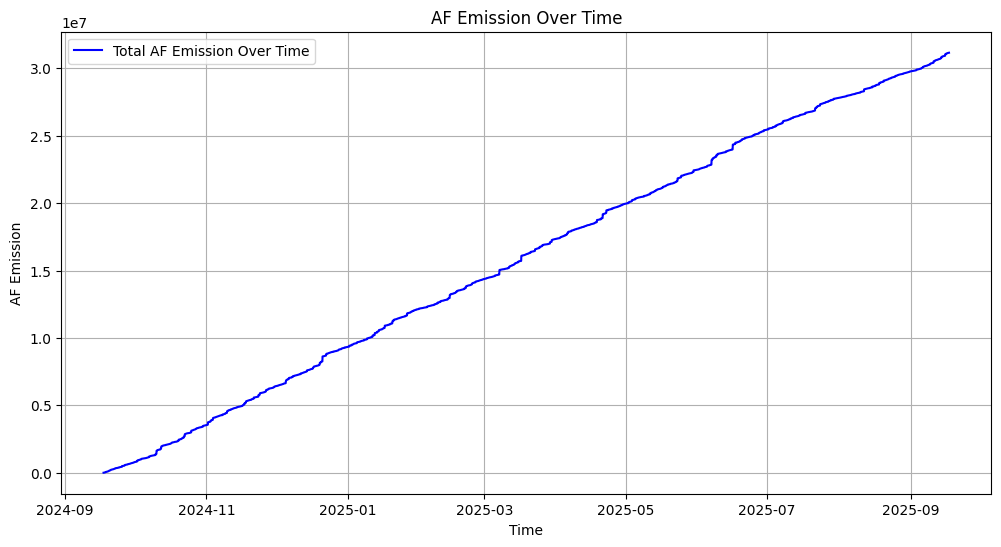

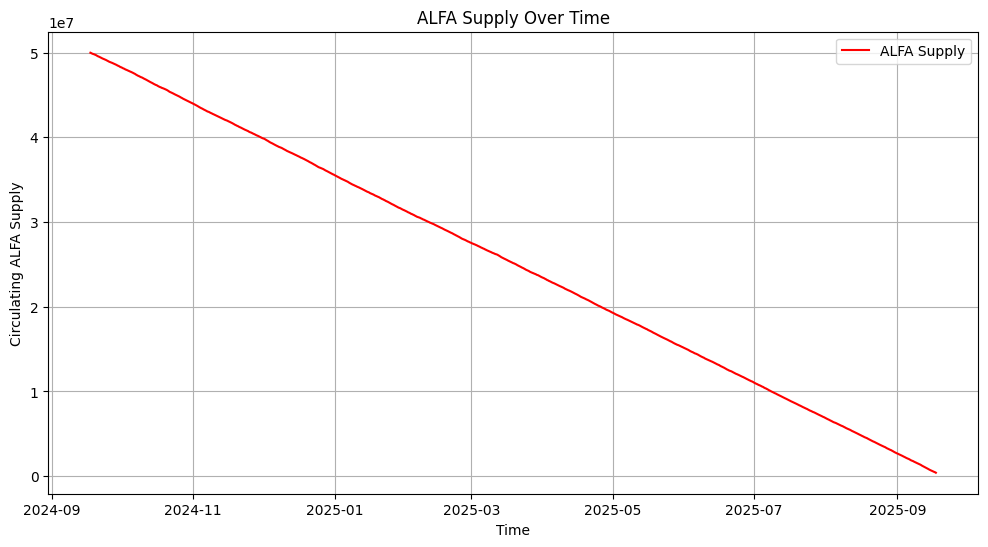

In [52]:
# Scenario Variables :
num_burn_events=10000
max_burn_amount=10000
max_drain_period=365
total_days=365

# Generate scenarios
timestamps, emissions, alfa_supply = generate_burning_scenarios(alfa_burning_program, num_burn_events, max_burn_amount, max_drain_period, total_days)

# Plot emissions over time
plot_burning_output(timestamps, emissions)
plot_alfa_supply_output(timestamps, alfa_supply)


